# Predicting Water Pump Functionality in Tanzania (HydroLogic Project)
Authored by Farzaneh Gerami, Subaye Opoku-Acquah & Mariam Farda | 
March – June 2025

# Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import f_oneway

import math

import datetime

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import joblib


# Sprint 1 - Data Exploration

## Load and Examine the Dataset Structure

In [2]:
## Read in all our Data

url_train_labels = "https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/raw/Training_Set_Labels.csv"
train_labels = pd.read_csv(url_train_labels)

url_train_values = "https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/raw/Training_Set_Values.csv"
train_values = pd.read_csv(url_train_values)

url_test_values = "https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/raw/Test_Set_Values.csv"
test_values = pd.read_csv(url_test_values)

print('Data is loaded!')

Data is loaded!


In [3]:
# Preview the dataset
train_labels.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [4]:
# Preview the dataset
train_values.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


## Merge Train Data

In [5]:
# Merge them
#df_train = train_values.merge(train_labels, on="id", how="left")
df_train = pd.merge(train_values, train_labels, on='id')
# df = pd.concat([df_values, df_labels], axis=1)

df_train.to_csv('../data/processed/Merged_Training_Set.csv', index=False) 

# Preview the dataset
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
# Shape of the dataset
print("Training Shape:", df_train.shape)
print("Test Shape:", test_values.shape)

Training Shape: (59400, 41)
Test Shape: (14850, 40)


In [7]:
# Overview of data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

# Looking at each Feature and Target

## Identification & basic info

In [8]:
# Look at the distribution of the date_recorded
df_train['date_recorded'].value_counts().sort_values(ascending=False)

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2013-01-06      1
2011-09-12      1
2011-09-27      1
2011-09-16      1
2011-09-19      1
Name: date_recorded, Length: 356, dtype: int64

Interpretation: Date_recorded: This is the date of data collection. We need to change the type to datetime64, extract the year and month to see if there is any meaningful relation between date recorded and group status

In [9]:
# Look at the distribution of the recorded_by
df_train['recorded_by'].value_counts().sort_values(ascending=False)

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

Interpretation: Recorded_by: This record is person / organization that record the data and all has a GeoData Consultants Ltd. Maybe we can drop that. 

# Location & Demographics

In [10]:
# Look at the distribution of the gps_height
df_train['gps_height'].value_counts().sort_values(ascending=False)

 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2424        1
 2552        1
 2365        1
 2128        1
 2038        1
Name: gps_height, Length: 2428, dtype: int64

Interpretation: gps_height: Elevaton in meters. range is between -90 - 2770. check if there is any meaningful relation between the target and gps_height

In [11]:
# Look at the distribution of the latitude
df_train['latitude'].value_counts().sort_values(ascending=False)

-2.000000e-08    1812
-6.992611e+00       2
-6.963557e+00       2
-2.485227e+00       2
-2.510639e+00       2
                 ... 
-6.917508e+00       1
-4.768812e+00       1
-6.823189e+00       1
-9.287251e+00       1
-1.077290e+01       1
Name: latitude, Length: 57517, dtype: int64

In [12]:
# Look at the distribution of the longitude
df_train['longitude'].value_counts().sort_values(ascending=False)

0.000000     1812
33.015597       2
37.375717       2
39.099069       2
31.619530       2
             ... 
39.732978       1
29.703335       1
31.408318       1
30.856588       1
35.164770       1
Name: longitude, Length: 57516, dtype: int64

latitude 6°23′31.20″ South, longitude 35°00′07.20″ East
Source: https://www.mapsofworld.com/lat_long/tanzania-lat-long.html
there is a table in this website with the all regions lonitude and latitude. Maybe we can import this table and correct the missing or zero inputs.

Interpretation: longitude in table are between min 0 and max 40.35 and latitude in table: min -11.65 to max 0.00000002

In [13]:
# Look at the distribution of the region
df_train['region'].value_counts().sort_values(ascending=False)

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [14]:
# Look at the distribution of the region_code
df_train['region_code'].value_counts().sort_values(ascending=False)

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [15]:
# Look at the distribution of the district_code
df_train['district_code'].value_counts().sort_values(ascending=False)

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [16]:
# Look at the distribution of the lga
df_train['lga'].value_counts().sort_values(ascending=False)

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [17]:
# Look at the distribution of the ward
df_train['ward'].value_counts().sort_values(ascending=False)

Igosi          307
Imalinyi       252
Siha Kati      232
Mdandu         231
Nduruma        217
              ... 
Nyamtinga        1
Ikweha           1
Kapilula         1
Machinjioni      1
Mawenzi          1
Name: ward, Length: 2092, dtype: int64

In [18]:
# Look at the distribution of the subvillage
df_train['subvillage'].value_counts().sort_values(ascending=False)

Madukani     508
Shuleni      506
Majengo      502
Kati         373
Mtakuja      262
            ... 
Mshonzini      1
Hayahaya       1
Tapaila B      1
Sikolomo       1
Rubwera        1
Name: subvillage, Length: 19287, dtype: int64

In [19]:
# Look at the distribution of the population
df_train['population'].value_counts().sort_values(ascending=False)

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
635         1
798         1
2010        1
644         1
1439        1
Name: population, Length: 1049, dtype: int64

In [20]:
# Look at the distribution of the wpt_name
df_train['wpt_name'].value_counts().sort_values(ascending=False)

none                    3563
Shuleni                 1748
Zahanati                 830
Msikitini                535
Kanisani                 323
                        ... 
Kwa Kitumbe                1
Deogratius Kichula         1
Kwa Robert Mgombela        1
Kwa Mzee Juma Hamisi       1
Msinga                     1
Name: wpt_name, Length: 37400, dtype: int64

Interpretation: This is name of the waterpoint (WPT = Water Point) most of the values are missed (none). 

# Water Source Info

In [21]:
# Look at the distribution of the source
df_train['source'].value_counts().sort_values(ascending=False)

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

Interpretation: source: we have some missing valies here that defined by unknown and also we have other

In [22]:
# Look at the distribution of the source_type
df_train['source_type'].value_counts().sort_values(ascending=False)

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

Interpretation: source_ type: The have the same calues but with different quantity. maybe we can group them. This one is better because has no unknown. 

In [23]:
# Look at the distribution of the source_class
df_train['source_class'].value_counts().sort_values(ascending=False)

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

Interpretation: source_class: Maybe we can guess the unknown by using the source and source_type.because this also has missed value filled by unknown

In [24]:
# Look at the distribution of the water_quality
df_train['water_quality'].value_counts().sort_values(ascending=False)

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [25]:
# Look at the distribution of the qulaity_group
df_train['quality_group'].value_counts().sort_values(ascending=False)

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

Interpretation: water quality and quality group are similar but the quality group has n unknown or missing values. 

In [26]:
# Look at the distribution of the quantity
df_train['quantity'].value_counts().sort_values(ascending=False)

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [27]:
# Look at the distribution of the quantity_group
df_train['quantity_group'].value_counts().sort_values(ascending=False)

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

Interpretation: quantity and quantity_group are both similar. we can drop one.

In [28]:
# Look at the distribution of the amount_tsh
df_train['amount_tsh'].value_counts().sort_values(ascending=False)

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
900.0           1
200000.0        1
8500.0          1
38000.0         1
Name: amount_tsh, Length: 98, dtype: int64

Interpretation: amount_tsh. It can be the water payment cost (TZ shillings)

In [29]:
# Look at the distribution of the num_private
df_train['num_private'].value_counts().sort_values(ascending=False)

0      58643
6         81
1         73
8         46
5         46
       ...  
698        1
87         1
668        1
60         1
94         1
Name: num_private, Length: 65, dtype: int64

Interpretation: num_private: Possibly count of private entities. i do not know if this has any meaning while the most fields are 0. Maybe we can drop this column.

# Pump/Infrastructure Info

In [30]:
# Look at the distribution of the funder
df_train['funder'].value_counts().sort_values(ascending=False)

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
                                  ... 
Wame Mbiki                           1
Salum Tambalizeni                    1
Opec                                 1
Member Of Perliament Ahmed Ali       1
Maerere                              1
Name: funder, Length: 1897, dtype: int64

Interpretation: funder: there are some types with only one quantity. So, those with less quantity would change to other

In [31]:
# Look at the distribution of the installer
df_train['installer'].value_counts().sort_values(ascending=False)

DWE             17402
Government       1825
RWE              1206
Commu            1060
DANIDA           1050
                ...  
LOOCIP              1
Jafary Mbaga        1
MISHENI             1
Msikitini           1
Chinese             1
Name: installer, Length: 2145, dtype: int64

Interpretation: installer: the same as funder. has some similar input as funder. Maybe better to group them.

In [32]:
# Look at the distribution of the construction_year
df_train['construction_year'].value_counts().sort_index(ascending=True)

0       20709
1960      102
1961       21
1962       30
1963       85
1964       40
1965       19
1966       17
1967       88
1968       77
1969       59
1970      411
1971      145
1972      708
1973      184
1974      676
1975      437
1976      414
1977      202
1978     1037
1979      192
1980      811
1981      238
1982      744
1983      488
1984      779
1985      945
1986      434
1987      302
1988      521
1989      316
1990      954
1991      324
1992      640
1993      608
1994      738
1995     1014
1996      811
1997      644
1998      966
1999      979
2000     2091
2001      540
2002     1075
2003     1286
2004     1123
2005     1011
2006     1471
2007     1587
2008     2613
2009     2533
2010     2645
2011     1256
2012     1084
2013      176
Name: construction_year, dtype: int64

Interpretation: construction_year: the construction happens between 1960 to 2013. we can check if there is any relation between the construction time and the target

In [33]:
# Look at the distribution of the permit
df_train['permit'].value_counts().sort_values(ascending=False)

True     38852
False    17492
Name: permit, dtype: int64

Interpretation: wheter there is a legal permit. This is boolean but now defined as object. Maybe first we need to change it to boolean. 

In [34]:
# Look at the distribution of the scheme_management
df_train['scheme_management'].value_counts().sort_values(ascending=False)

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

Interpretation: I found scheme_management and management quite similar. but management has more missing values. 

In [35]:
# Look at the distribution of the scheme_name
df_train['scheme_name'].value_counts().sort_values(ascending=False)

K                            682
None                         644
Borehole                     546
Chalinze wate                405
M                            400
                            ... 
Iton                           1
Mradi wa maji wa matalawe      1
Mahunguru water supply         1
Mradi wa maji wa Kilagano      1
Nike gravity water supply      1
Name: scheme_name, Length: 2696, dtype: int64

Interpretation: There are so many missing value in this column. we can keep the higher quantity types and change to the other the rest.

In [36]:
# Look at the distribution of the management
df_train['management'].value_counts().sort_values(ascending=False)

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [37]:
# Look at the distribution of the management_group
df_train['management_group'].value_counts().sort_values(ascending=False)

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

# Technical Characteristics

In [38]:
# Look at the distribution of the extraction_type
df_train['extraction_type'].value_counts().sort_values(ascending=False)

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [39]:
# Look at the distribution of the _group
df_train['extraction_type_group'].value_counts().sort_values(ascending=False)

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [40]:
# Look at the distribution of the _group
df_train['extraction_type_class'].value_counts().sort_values(ascending=False)

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

Interpretation: extraction_type_class, extraction_type_group, extraction_type: They are talking about the mechanism for drawing water. we have 5 types of other! the extraction_type and extraction_type_group are similar. but in my opinion the extraction_type_class is more accurate. Maybe we need to see if there any relation between this and the target.

In [41]:
# Look at the distribution of the _group
df_train['waterpoint_type'].value_counts().sort_values(ascending=False)

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [42]:
# Look at the distribution of the _group
df_train['waterpoint_type_group'].value_counts().sort_values(ascending=False)

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

Interpretation: water_type and water_typegroup: These two features are also quite similar. one has 7 types and the other 6 types. maybe the waterpoint_type is more accurate. 

# Outcome Variables

In [43]:
# Look at the distribution of the target variable
df_train['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [44]:
# Percentage of the target variable
percentage = (df_train['status_group'].value_counts()/59400) * 100
print(percentage)

functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: status_group, dtype: float64


## Missing Values

In [45]:
# Count missing values in each column (how many NaNs are in each column)
missing_values_count = df_train.isnull().sum().sort_values(ascending=False).head(10)
missing_values_count

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
payment                      0
waterpoint_type_group        0
extraction_type_group        0
dtype: int64

In [46]:
#### The percentage of missing values in our train data

# total number of cells in dataframe
total_cells = np.prod(df_train.shape) # np.prod is calculating the product of dimention of the Dataframe

# count missing cells
total_missing = df_train.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

print(f"Total missing values: {total_missing}")
print(f"Percentage of missing data: {percent_missing:.2f}%")

Total missing values: 46094
Percentage of missing data: 1.89%


In [47]:
# Create a DataFrame showing total and percentage of missing values per column
missing_data = pd.DataFrame({
    'Total Missing': df_train.isnull().sum(),
    'Percent Missing': (df_train.isnull().sum() / len(df_train)) * 100
})

# Sort the DataFrame by 'Percent Missing' in descending order
missing_data_sorted = missing_data.sort_values(by='Percent Missing', ascending=False)

missing_data_sorted.head(10)

,Total Missing,Percent Missing
scheme_name,28166,47.417508
scheme_management,3877,6.526936
installer,3655,6.153199
funder,3635,6.119529
public_meeting,3334,5.612795
permit,3056,5.144781
subvillage,371,0.624579
payment,0,0.000000
waterpoint_type_group,0,0.000000
extraction_type_group,0,0.000000


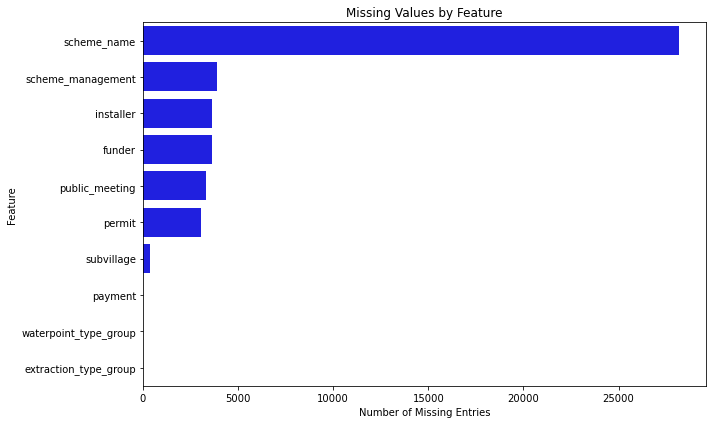

In [48]:
# Visualizing Missingness

plt.figure(figsize=(10, 6))
sns.barplot(x = missing_values_count.values, y=missing_values_count.index, color='blue')
plt.title('Missing Values by Feature')
plt.xlabel('Number of Missing Entries')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [49]:
# Count how many times 0 appears in each column
zero_counts = (df_train == 0).sum().sort_values(ascending=False)

# Display top 10 columns with the most zero values
print(zero_counts.head(10))

num_private          58643
amount_tsh           41639
population           21381
construction_year    20709
gps_height           20438
permit               17492
public_meeting        5055
longitude             1812
district_code           23
id                       1
dtype: int64


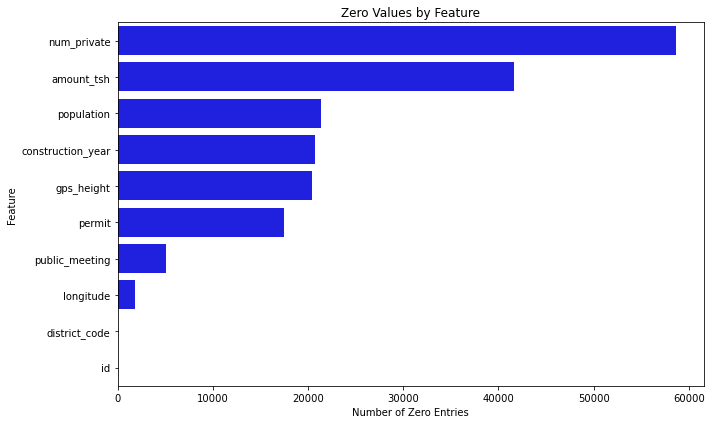

In [50]:
# Visualizing and Grouping 0

plt.figure(figsize=(10, 6))
sns.barplot(x = zero_counts.values[:10], y=zero_counts.index[:10], color='blue')
plt.title('Zero Values by Feature')
plt.xlabel('Number of Zero Entries')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Dataset Profile Summary

In [51]:
# Basic summary statics
def feature_summary(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Missing Values': df.isnull().sum(),
        'Zero Values': (df == 0).sum(),
        'Unique Values': df.nunique()
    })
    # Add Percent of Missing Values
    summary['% Missing'] = (summary['Missing Values'] / len(df)) * 100
    
    # Classify Feature Type
    def classify_feature(col):
        if df[col].dtype == 'object':
            return 'Categorical'
        elif df[col].dtype in ['int64', 'float64']:
            if df[col].nunique() < 15:
                return 'Ordinal/Categorical'
            return 'Numerical'
        elif df[col].dtype == 'bool':
            return 'Boolean'
        elif 'date' in col:
            return 'Date'
        else:
            return 'Other'
    # Applies the classifier to each column.
    summary['Feature Type'] = summary.index.to_series().apply(classify_feature)
    return summary.sort_values(by='Missing Values', ascending=False)

# Run the summary
feature_summary(df_train)

,Data Type,Missing Values,Zero Values,Unique Values,% Missing,Feature Type
scheme_name,object,28166,0,2696,47.417508,Categorical
scheme_management,object,3877,0,12,6.526936,Categorical
installer,object,3655,0,2145,6.153199,Categorical
funder,object,3635,0,1897,6.119529,Categorical
public_meeting,object,3334,5055,2,5.612795,Categorical
permit,object,3056,17492,2,5.144781,Categorical
subvillage,object,371,0,19287,0.624579,Categorical
payment,object,0,0,7,0.000000,Categorical
waterpoint_type_group,object,0,0,6,0.000000,Categorical
extraction_type_group,object,0,0,13,0.000000,Categorical


# Summary of Interpretation: 
Date_recorded: This is the date of data collection. We need to change the type to datetime64, extract the year and month to see if there is any meaningful relation between date recorded and group status. 

Recorded_by: This record is person / organization that record the data and all has a GeoData Consultants Ltd. Maybe we can drop that. 

gps_height: Elevaton in meters. range is between -90 - 2770. check if there is any meaningful relation between the target and gps_height.

Latitude and langitude: latitude 6°23′31.20″ South, longitude 35°00′07.20″ East
Source: https://www.mapsofworld.com/lat_long/tanzania-lat-long.html
there is a table in this website with the all regions lonitude and latitude. Maybe we can import this table and correct the missing or zero inputs.
longitude in table are between min 0 and max 40.35 and latitude in table: min -11.65 to max 0.00000002.  we may also can use these region names and other location features to complete the latitude and longitude in geospatial analysis. 


wpt_name: This is name of the waterpoint (WPT = Water Point) most of the values are missed (none). Maybe we can drop this. or with geospatial we can have a look if we can impute.

Source and Source_type: They have similar types but source has unknown and source_type has not. Maybe we can group them or use for imputing. 

source_class: Maybe we can guess the unknown by using the source and source_type.because this also has missed value filled by unknown. 

water_quality and quality_group: water_quality and quality_group are similar but the quality group has n unknown or missing values. 

quantity and quantity_group: quantity and quantity_group are both completely similar. we can drop one.

amount_tsh: It can be the water payment cost (TZ shillings). I have no idea how we can use it.But i think we can see if they could allocate money for repair or not or something like this. 

num_private: Possibly count of private entities. i do not know if this has any meaning while the most fields are 0. Maybe we can drop this column.

funder: there are some types with only one quantity. So, those with less quantity would change to other

installer: the same as funder. has some similar input as funder. Maybe better to group them.

construction_year: the construction happens between 1960 to 2013. we can check if there is any relation between the construction time and the target

scheme_management and management: I found scheme_management and management quite similar. but management has more missing values. 

extraction_type_class, extraction_type_group, extraction_type: They are talking about the mechanism for drawing water. we have 5 types of other! the extraction_type and extraction_type_group are similar. but in my opinion the extraction_type_class is more accurate. Maybe we need to see if there any relation between this and the target.

water_type and water_typegroup: These two features are also quite similar. one has 7 types and the other 6 types. maybe the waterpoint_type is more accurate. 

# Finding the relation between the target and some features

In [52]:
# Average gps_height for each status group
df_train.groupby("status_group")["gps_height"].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,740.131188,724.193683,-90.0,0.0,550.0,1404.0,2628.0
functional needs repair,4317.0,627.607135,648.397850,-51.0,0.0,385.0,1243.0,2770.0
non functional,22824.0,574.464774,642.752316,-59.0,0.0,293.0,1211.0,2627.0


nterpretation: the distribution shows that Functional pumps tend to be located at higher elevations, with both the mean and median GPS height notably higher than those in the "non functional" group.Pumps that need repair lie in between; higher than "non functional" but lower than "functional".

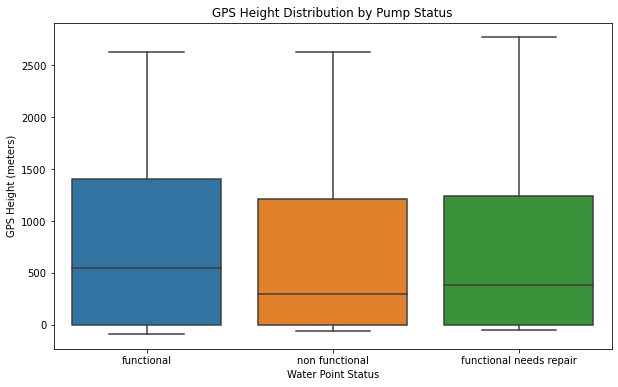

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x="status_group", y="gps_height")
plt.title("GPS Height Distribution by Pump Status")
plt.xlabel("Water Point Status")
plt.ylabel("GPS Height (meters)")
plt.show()

Interpretation: The distribution shifts upward for functional pumps.There's a wider range in GPS height among functional pumps, possibly indicating that these are maintained even in less accessible (higher) areas. Non-functional pumps cluster at lower altitudes, suggesting a possible environmental or logistical factor affecting functionality.

In [54]:
# Extract values for each group
groups = [group["gps_height"].dropna() for name, group in df_train.groupby("status_group")]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

ANOVA F-statistic: 395.01, p-value: 0.0000


A small p-value (e.g. < 0.05) indicates a significant difference in gps_height among the status_groups.

Conclusion: 
My conclusion is that there is a strong relationship between water pump functionality (status_group) and elevation (gps_height). the plot and means shows that Higher elevation pumps are more likely to be functional, possibly due to better installation/maintenance or less groundwater contamination.

In [55]:
# Average latitude for each status group
df_train.groupby("status_group")["latitude"].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,-5.704921,2.897323,-11.564324,-8.640908,-4.904257,-3.322252,-2.000000e-08
functional needs repair,4317.0,-5.162580,3.099036,-11.649440,-7.860679,-4.656811,-3.158054,-2.000000e-08
non functional,22824.0,-5.810394,2.973262,-11.586297,-8.515783,-5.421238,-3.350447,-2.000000e-08


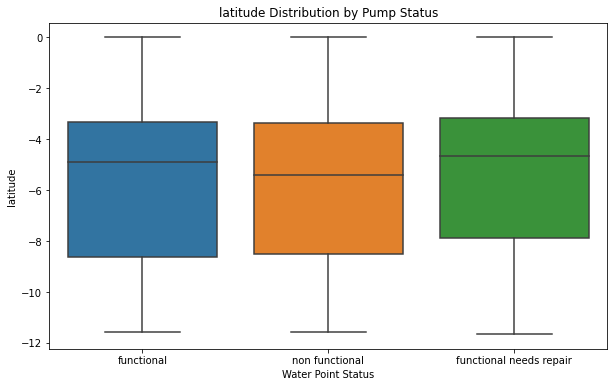

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x="status_group", y="latitude")
plt.title("latitude Distribution by Pump Status")
plt.xlabel("Water Point Status")
plt.ylabel("latitude")
plt.show()

In [57]:
# Extract values for each group
groups = [group["latitude"].dropna() for name, group in df_train.groupby("status_group")]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

ANOVA F-statistic: 88.03, p-value: 0.0000


conclusion: More functional pumps are located further north (closer to 0° latitude).Non-functional pumps are generally further south (larger negative values). I think we have to look to the governance, installer and funder to know if there is any relation between them. maybe in the northen areas have better access to the resources or better government support and in the southern area face some challenges for the maintenance for example weaker funder or installer. Also we can research about the different weather in different geographic location. Maybe that can impact the water and the technology suitability. or also we can look the region, if it is in the urban or rural areas. 

In [58]:
# Average Longitude for each status group
df_train.groupby("status_group")["longitude"].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,34.242071,6.200054,0.0,33.368557,34.969884,37.057074,40.345193
functional needs repair,4317.0,31.242086,10.169667,0.0,30.799300,33.827215,36.668018,40.283599
non functional,22824.0,34.381006,6.059035,0.0,33.002248,34.958415,37.567890,40.344301


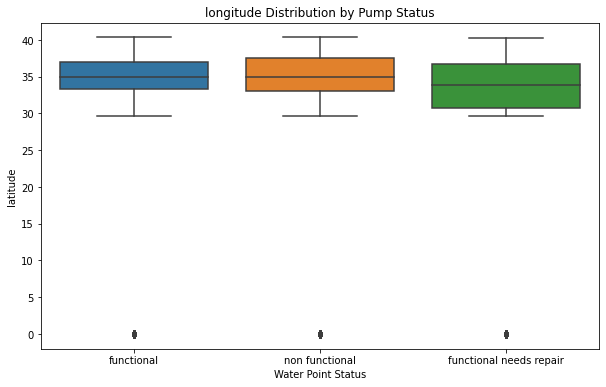

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x="status_group", y="longitude")
plt.title("longitude Distribution by Pump Status")
plt.xlabel("Water Point Status")
plt.ylabel("latitude")
plt.show()

In [60]:
# Extract values for each group
groups = [group["longitude"].dropna() for name, group in df_train.groupby("status_group")]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

ANOVA F-statistic: 443.35, p-value: 0.0000


Conclusion: western Tanzania (lower longitude) seems to have more pupms needing repair. that can have any reason, maybe that is better to know the relation between the funder, installer and the goverment if they support the maintenance or not! Central and Eastern regions (mid to high longitudes) maintain a better balance between functional and non-functional pumps.

In [61]:
# Average amount_tsh for each status group
df_train.groupby("status_group")["amount_tsh"].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,461.798235,3889.735284,0.0,0.0,0.0,50.0,350000.0
functional needs repair,4317.0,267.071577,1925.026420,0.0,0.0,0.0,50.0,100000.0
non functional,22824.0,123.481230,1110.120571,0.0,0.0,0.0,0.0,117000.0


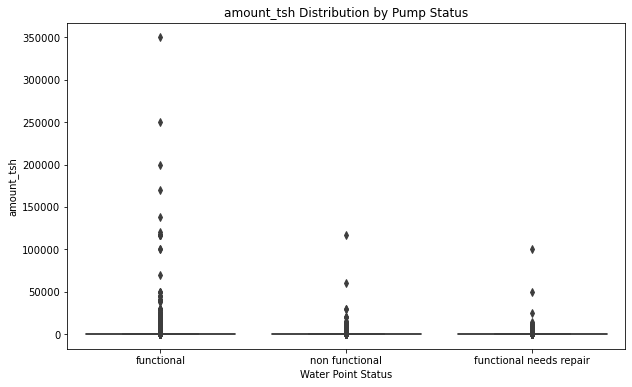

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x="status_group", y="amount_tsh")
plt.title("amount_tsh Distribution by Pump Status")
plt.xlabel("Water Point Status")
plt.ylabel("amount_tsh")
plt.show()

In [63]:
# Extract values for each group
groups = [group["amount_tsh"].dropna() for name, group in df_train.groupby("status_group")]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

ANOVA F-statistic: 86.04, p-value: 0.0000


conclusion: seems that amount paid (amount_tsh) is significantly related to pump functionality. this has too much 0 that may impact. we have to look again after handling missing data.

In [64]:
# Average population for each status group
df_train.groupby("status_group")["population"].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,187.553303,513.198991,0.0,0.0,40.0,200.0,30500.0
functional needs repair,4317.0,175.102154,433.033756,0.0,0.0,25.0,245.0,15300.0
non functional,22824.0,170.016430,413.094978,0.0,0.0,1.0,230.0,9865.0


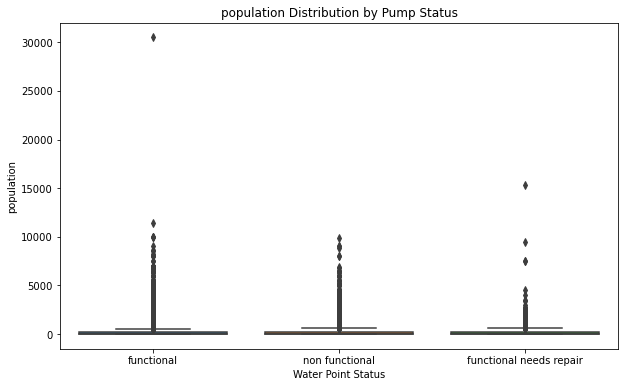

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x="status_group", y="population")
plt.title("population Distribution by Pump Status")
plt.xlabel("Water Point Status")
plt.ylabel("population")
plt.show()

In [66]:
# Extract values for each group
groups = [group["population"].dropna() for name, group in df_train.groupby("status_group")]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

ANOVA F-statistic: 9.49, p-value: 0.0001


Conclusion: seems again that population size has a significant relationship with pump functionality. This also has so much 0 that should be considered before having any conclusion. 